# Jira Case Study - Author: Ari Yeganeh

In this notebook, we'll be exploring the dataset provided here: https://drive.google.com/file/d/1lwTnTOjjtbvde9onV52UAr0FRT6Jtkdj/view?usp=sharing


This data is a very small subset of our customers (16 instances) for Jira family of products. It covers ~1 month and represents ~500 end users.
All strings and some numeric values are hashed for privacy reasons. However, the same hashing method is used for each string, so it is possible to link for example 'issueKey' across different events.

With following outcomes:
1. Describe the data set in broad strokes.  Note down any data anomalies, outliers or anything you think is unusual in the data set.
2.  Compare users "778251ffec35de6bbbb089198b9ac516" and "7e7a085a9f6f55253b2aa15dbcb702a8" from the instance "c93da7e17688ef90fc43963b5a6c6259"; would you conclude their average number of events per day to be different? Justify your answer.
3.  Our users tend to use multiple features together when they use our products. Cluster events that tend to appear together into groups, and explain how and why you have clustered events in such a way.
4.  Is there anything else you find interesting about the usage pattern you'd like to tell us?



In [75]:
import pandas as pd 
import plotly.express as px
import seaborn  as sns 
import matplotlib.pyplot as plt

df = pd.read_csv("jira_clean.tsv", sep='\t', header=None)

# time_string : Date and time in readable format
# unix_time : Timestamp (in milliseconds)
# instance : The name of the customer
# product : Always equal to 'jira'
# username : A user ID
# event: action that user makes. Typically one event per user-click, but that's not always the case since sometimes one action may trigger more than one event.
# attributes : Extra information about the event in JSON-like format

# Let's rename our column headers as above
df.columns = ['time_string', 'unix_time', 'instance', 'product', 'username', 'event', 'attributes']

df.head()

,time_string,unix_time,instance,product,username,event,attributes
0,"2014-12-01 16:00:02,153",1417410002153,3998740a9e4924af7feedeb2e04190f6,jira,d50d63ec8ecdf32d1dd9ae4a0cecd2f8,quickbrowse,{'issueKey': 'eaf34eb91618cf3e1bf487a822a2cce6'}
1,"2014-12-01 16:00:07,691",1417410007691,3998740a9e4924af7feedeb2e04190f6,jira,d50d63ec8ecdf32d1dd9ae4a0cecd2f8,kickass.criteriaAutoUpdateEnabled,{'context_pageTime': '6ce628243b670aff9f549029...
2,"2014-12-01 16:00:07,691",1417410007691,3998740a9e4924af7feedeb2e04190f6,jira,d50d63ec8ecdf32d1dd9ae4a0cecd2f8,kickass.viewIssue,{'context_pageSession': 'a09b1242b4712e1cb23bf...
3,"2014-12-01 16:00:07,691",1417410007691,3998740a9e4924af7feedeb2e04190f6,jira,d50d63ec8ecdf32d1dd9ae4a0cecd2f8,browserWindowSize,"{'width': '00409424d52c3a1a30e98cd1cd91638a', ..."
4,"2014-12-01 16:00:10,523",1417410010523,c93da7e17688ef90fc43963b5a6c6259,jira,2cc91ff23ca6213e8a7d2513a31d8fa8,lexorankbalance,{'fieldId': '4537ecbd3f85c18825157673510a445d'...


In [68]:
# check for missing values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 592458 entries, 0 to 592457
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   time_string  592458 non-null  object
 1   unix_time    592458 non-null  int64 
 2   instance     592458 non-null  object
 3   product      592458 non-null  object
 4   username     592458 non-null  object
 5   event        592458 non-null  object
 6   attributes   592458 non-null  object
dtypes: int64(1), object(6)
memory usage: 31.6+ MB


High level our data looks to be complete without any missing values. 

Looking at column types, we need to convert time_string into appropriate date field

In [82]:
df['time_string'] = pd.to_datetime(df['time_string'])

# and let's create a new column capturing the date
#df['date'] = df['time_string'].dt.date

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 592458 entries, 0 to 592457
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   time_string  592458 non-null  datetime64[ns]
 1   unix_time    592458 non-null  int64         
 2   instance     592458 non-null  object        
 3   product      592458 non-null  object        
 4   username     592458 non-null  object        
 5   event        592458 non-null  object        
 6   attributes   592458 non-null  object        
 7   date         592458 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(5)
memory usage: 36.2+ MB


In [121]:
#  attributes come back to this if time permits
#import json
#from pandas.io.json import json_normalize

#attr_json = df['attributes'].to_json()
df['date'] = pd.to_datetime(df['time_string'].dt.date)

In [124]:
df.head()

,time_string,unix_time,instance,product,username,event,attributes,date
0,2014-12-01 16:00:02.153,1417410002153,3998740a9e4924af7feedeb2e04190f6,jira,d50d63ec8ecdf32d1dd9ae4a0cecd2f8,quickbrowse,{'issueKey': 'eaf34eb91618cf3e1bf487a822a2cce6'},2014-12-01
1,2014-12-01 16:00:07.691,1417410007691,3998740a9e4924af7feedeb2e04190f6,jira,d50d63ec8ecdf32d1dd9ae4a0cecd2f8,kickass.criteriaAutoUpdateEnabled,{'context_pageTime': '6ce628243b670aff9f549029...,2014-12-01
2,2014-12-01 16:00:07.691,1417410007691,3998740a9e4924af7feedeb2e04190f6,jira,d50d63ec8ecdf32d1dd9ae4a0cecd2f8,kickass.viewIssue,{'context_pageSession': 'a09b1242b4712e1cb23bf...,2014-12-01
3,2014-12-01 16:00:07.691,1417410007691,3998740a9e4924af7feedeb2e04190f6,jira,d50d63ec8ecdf32d1dd9ae4a0cecd2f8,browserWindowSize,"{'width': '00409424d52c3a1a30e98cd1cd91638a', ...",2014-12-01
4,2014-12-01 16:00:10.523,1417410010523,c93da7e17688ef90fc43963b5a6c6259,jira,2cc91ff23ca6213e8a7d2513a31d8fa8,lexorankbalance,{'fieldId': '4537ecbd3f85c18825157673510a445d'...,2014-12-01


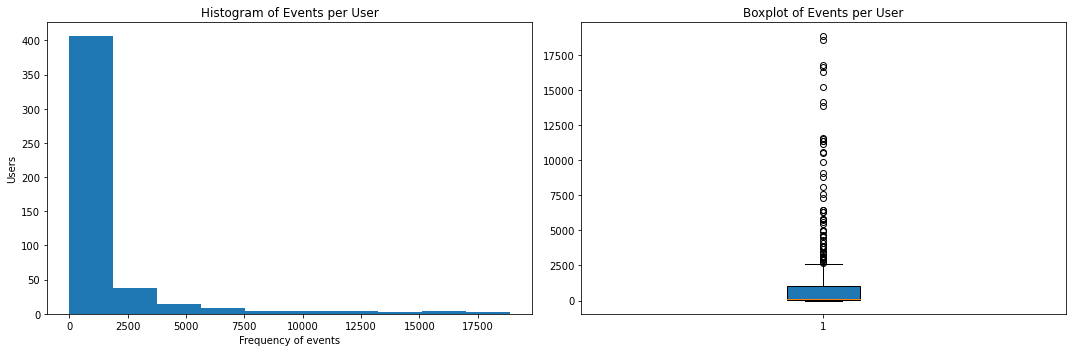

In [223]:
user_count = df['username'].value_counts()

plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.hist(user_count)
plt.title('Histogram of Events per User')
plt.xlabel('Frequency of events')
plt.ylabel('Users')

plt.subplot(1, 2, 2)
plt.title('Boxplot of Events per User')
plt.boxplot(user_count, patch_artist=True)
plt.tight_layout()
plt.show()


Here we can see quite a wide distribution for events per user suggesting different user profiles of Jira. e.g. Power users vs. Typical users vs. Lite users.

We may want to investigate the types of events users are engaged in to verify these are valid actions.

At this point it's difficult to rule out any user activity without deep diving into types of events and event attributes.

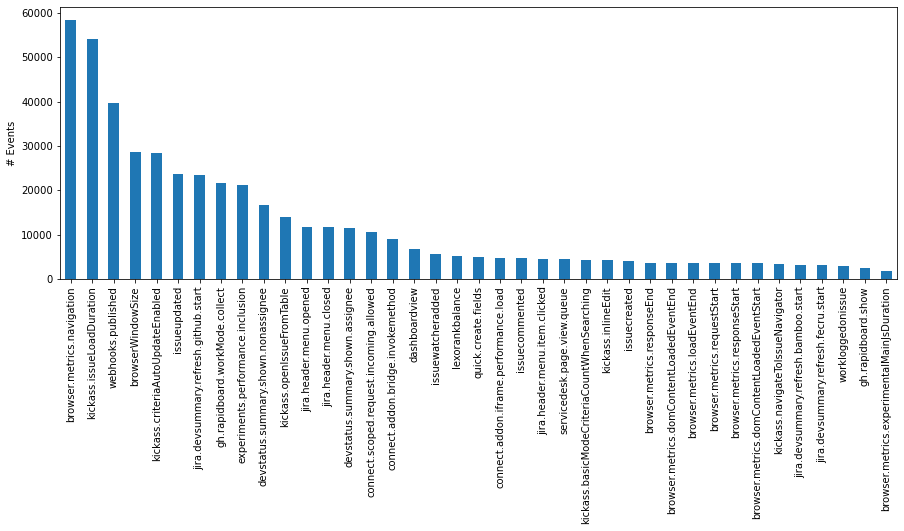

In [224]:
plt.subplots(figsize=(15, 5))
df['event'].value_counts()[1:40].plot(kind="bar")
plt.ylabel('# Events')
plt.show()

We can see a similar long tail distribution for the types of events users are engaged in. However, we need to dig deeper into the types of events as not all are directly related/relevant to user actions. 


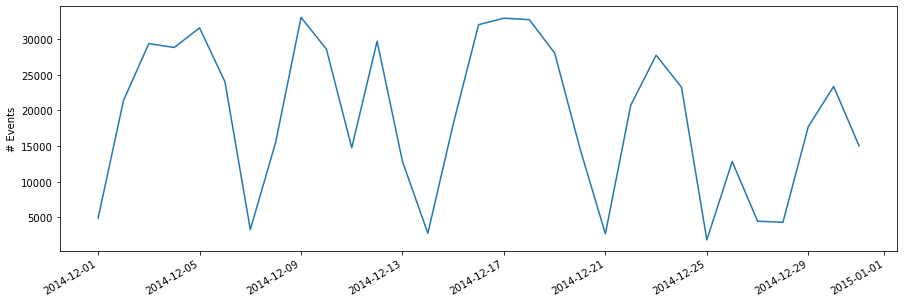

In [226]:
plt.subplots(figsize=(15, 5))
date_count = df['date'].value_counts().plot(kind="line")
plt.ylabel('# Events')
plt.show()

In [149]:
# Let's look at key fields, counts and trends over time

date_sum = df.groupby(['date']).agg({'event': 'count',
                          'instance':['nunique'],
                          'username':['nunique']
                         }).reset_index()
                        #.rename(columns={'sum':'valuesum','sell' : 'selltime'})

# Drop a level so there is only one index
date_sum.columns = date_sum.columns.droplevel(level=1)
date_sum['event_per_user'] = date_sum['event'] / date_sum['username']
#print(date_sum)

date_sum['weekday'] = date_sum['date'].dt.day_name()

fig = px.line(date_sum, x="date", y="username", 
              labels={
                     "username":"Number of users"
                 },
             title = "Number of Users over time")
fig.show()

fig = px.scatter(date_sum, x="date", y="event", color ='weekday' , size = 'event',
              labels={
                     "event":"Number of events"
                 },
             title = "Number of events over time by day of week")
fig.show()


We can see the number of events over time varies significantly based on day of week and seasonal holidays at end of year.
It is interesting we're still getting reasonable volumes on Saturdays. This could be legitimate volume or caused by differences in timezones.



0            Monday
1            Monday
2            Monday
3            Monday
4            Monday
            ...    
592453    Wednesday
592454    Wednesday
592455    Wednesday
592456    Wednesday
592457    Wednesday
Name: date, Length: 592458, dtype: object

In [ ]:

event_sum = df.groupby(['event']).agg({'time_string': 'count',
                          'instance':['nunique'],
                          'username':['nunique']
                         })

# Drop a level so there is only one index
event_sum.columns = event_sum.columns.droplevel(level=1)
event_sum.sort_values(by='time_string', ascending=[False])

#plot the bar graph of percentage job categories
#data.job.value_counts(normalize=True).plot.barh()
#plt.show()